In [99]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import os 
import cv2 as cv


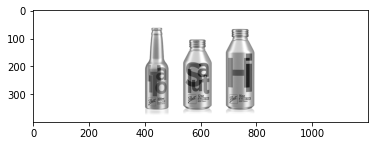

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

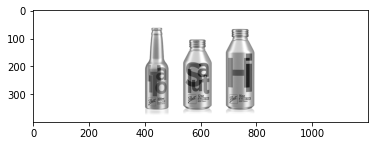

In [100]:
Bottle_images=(r"C:\Users\Srinidhi Chandra\Desktop\Course-Intelligent systems 2021-22\Sem-1\Neuroinformatics and Neurotechnology\projects\bottle_detection\images")
categories=["bottles", "keyboard"]
for category in categories:
    path=os.path.join(Bottle_images,category)
    for get_direc in os.listdir(path):
        image=cv.imread(os.path.join(path, get_direc),cv.IMREAD_GRAYSCALE)
        plt.imshow(image,cmap='gray')
        plt.show(image)
        break
    break

In [101]:
print(image)
# 255 is White and 0 is black points in an image
print(image.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(399, 1200)


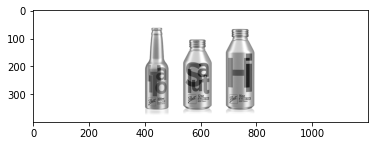

(100, 100)


In [102]:
pix_size_change=cv.resize(image,(100,100))
plt.imshow(image,cmap='gray')
plt.show()
print(pix_size_change.shape)

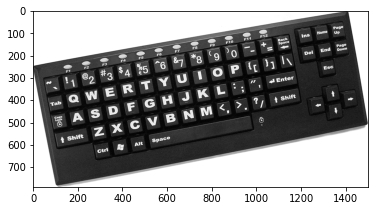

In [ ]:
# We are creating a fucntion to append and get all the images resized and storing it in an array
train_data=[]
def data_train():
    for category in categories:
        path=os.path.join(Bottle_images,category)
        # we are finding the name of the images #
        name_of_img=categories.index(category)
        for get_direc in os.listdir(path):
            image=cv.imread(os.path.join(path, get_direc),cv.IMREAD_GRAYSCALE)
            pix_size_change=cv.resize(image,(100,100))
            train_data.append([pix_size_change,name_of_img])
            plt.imshow(image,cmap='gray')   
data_train()   
# this code is to show the total images in the folder
print(len(train_data))

In [ ]:
# Usually we consider x and y for training data
x=[]
y=[]

In [ ]:
# This shuffles the images of bottles and keyboard to increase accuracy
import random
random.shuffle(train_data)

In [ ]:
# We are appending image names to the corresponding image
for features,values in train_data:
    x.append(features)
    y.append(values) 
#converting the numpy array into 4Dimensions
x=np.array(x).reshape(-1,100,100,1)

In [ ]:
print(x[3].shape)
print(y)


(100, 100)
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]


In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
x=np.array(x)
y=np.array(y)

In [104]:
###### THIS CODE HAS THE MAIN NEURAL NETWORK LAYER ######
# Conv2D is a 2D layer in a Simple sequential model in a 3x3 window

model=Sequential()
    # THIS IS THE FIRST 1,64 LAYER
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

    # THIS IS THE SECOND 2,64 LAYER
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution2D needs to Flatten the data before feeding it to the Dense
model.add(Flatten())
model.add(Dense(64))

    # Output Layer
model.add(Dense(1))

    # Activation layer
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

model.fit(x,y, batch_size=2, epochs=10, validation_split=0.1)

Epoch 1/10
95/95 [==============================] - 3s 27ms/step - loss: 44.3705 - accuracy: 0.5556 - val_loss: 0.6560 - val_accuracy: 0.7143
Epoch 2/10
95/95 [==============================] - 2s 26ms/step - loss: 0.5694 - accuracy: 0.6720 - val_loss: 0.5644 - val_accuracy: 0.7619
Epoch 3/10
95/95 [==============================] - 2s 26ms/step - loss: 0.3885 - accuracy: 0.8042 - val_loss: 0.4193 - val_accuracy: 0.8095
Epoch 4/10
95/95 [==============================] - 2s 26ms/step - loss: 0.4152 - accuracy: 0.7989 - val_loss: 111.3116 - val_accuracy: 0.7143
Epoch 5/10
95/95 [==============================] - 2s 26ms/step - loss: 3.7613 - accuracy: 0.7619 - val_loss: 0.2602 - val_accuracy: 0.8095
Epoch 6/10
95/95 [==============================] - 2s 25ms/step - loss: 0.2896 - accuracy: 0.8307 - val_loss: 0.3713 - val_accuracy: 0.8095
Epoch 7/10
95/95 [==============================] - 2s 26ms/step - loss: 0.3287 - accuracy: 0.8730 - val_loss: 0.2680 - val_accuracy: 0.8571
Epoch 8/10

In [ ]:
def prepare(filepath):
    img_array=cv.imread(filepath,cv.IMREAD_GRAYSCALE)
    new_array=cv.resize(img_array,(100,100))
    return new_array.reshape(-1,100,100,1)

model=tf.keras.models.load_model()